In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


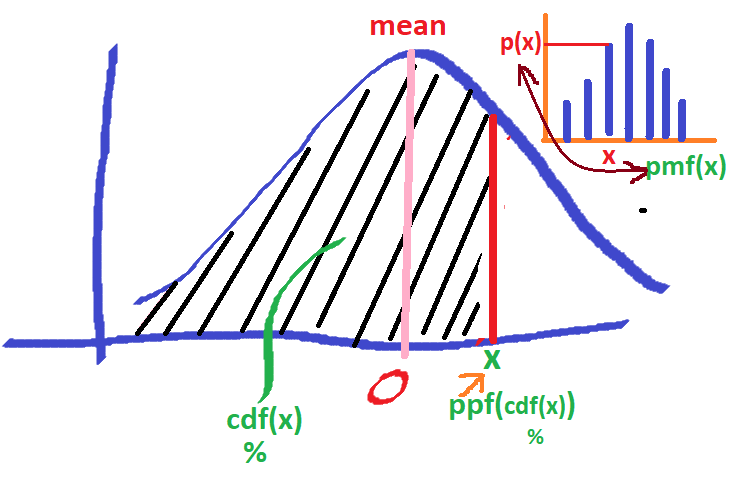

In [ ]:
stats.norm.ppf

## Question 1
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 3.40**

The probability that a patient recovers from a stomach disease is 0.8. 

Suppose 20 people are known to have contracted this disease. 

What is the probability that

### a. exactly 14 recover?

this is P(X=14)

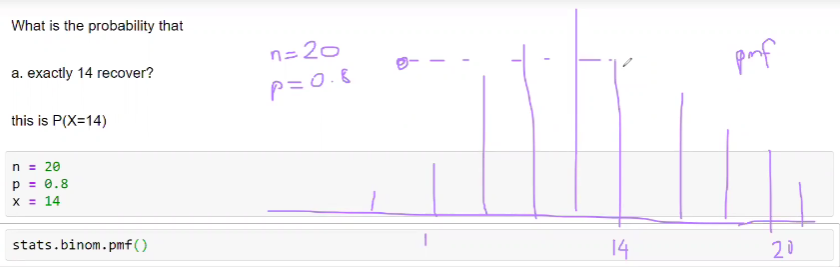

In [3]:
# docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

n = 20
p = 0.8
k = 14

# scipy kodlarında x yerine k kullanıldığı için burada da k değişkenini kullandık.

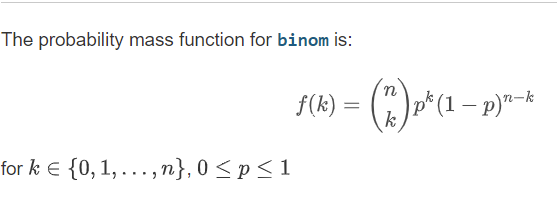

In [5]:
# PMF formülü yukarda olduğu gibidir. scipy bunun hesaplamasını bizim için yapıyor.

stats.binom.pmf(k, n, p)
# tam olarak 14 hastanın iyileşme olasılığı 10.9 % imiş.

0.10909970097304983

### b. at least 10 recover?

In [4]:
stats.binom.pmf(10, n, p) + stats.binom.pmf(11, n, p) + stats.binom.pmf(12, n, p) + stats.binom.pmf(13, n, p) + stats.binom.pmf(14, n, p) + stats.binom.pmf(15, n, p) + stats.binom.pmf(16, n, p) + stats.binom.pmf(17, n, p) + stats.binom.pmf(18, n, p) + stats.binom.pmf(19, n, p) + stats.binom.pmf(20, n, p) 

0.9994365863023381

In [13]:
stats.binom.pmf(10, n, p)

0.002031413703013826

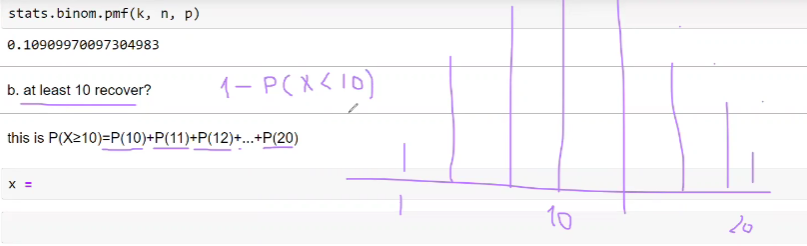

In [5]:
k = 9


In [6]:
stats.binom.cdf(k, n, p) 

# Bu, 10'a kadar olan olasılıkların toplamı (1 - 9 dahil)

0.0005634136976601897

In [7]:
1 - stats.binom.cdf(k, n, p)

# bu da 10-20 arası olasılıkların toplamı. yani benden istenen yüzde.
# demek ki en az 10 hastanın iyileşme olasılığı 99.95 gibi çok yüksek bir oran

0.9994365863023398

### c. at least 14 but not more than 18 recover?

X = 14 ile 18 arasında olması durumunda p yi soruyor. 
yani P(14) + P(15) + P(16) + P(17) +P(18)

In [7]:
# önce uzun yoldan yapıyorumthis is P(14≤X≤18)=P(14)+P(15)+...+P(18)

x1 = 14
x2 = 18

# 14'ten 18 e kadar  her bir x değerinin pmf ile probability'lerini bulup toplarım. 

In [8]:
stats.binom.pmf(14,n,p)+stats.binom.pmf(15,n,p)+stats.binom.pmf(16,n,p)+stats.binom.pmf(17,n,p)+stats.binom.pmf(18,n,p)

0.8441321961561871

In [15]:

stats.binom.cdf(x2,n,p) - stats.binom.cdf(x1-1,n,p)


0.844132196156189

### d. at most 16 recover?

en fazla 16 hastanın iyileşmesi? x = 16'ya kadar olan kümülatif (16  dahil)

at most 16 dediğinde : o rakam dahil (X <= 16) oluyor.

at least 16 dediğinde : o rakam dahil (X >= 16) oluyor

this is P(X≤16)=1−P(X>16)=P(17)+P(18)+P(19)+P(20)

In [16]:
k = 16

# at most dediği için 16'yı dahil olarak kabul edeceğiz.

In [17]:
stats.binom.cdf(k,n,p)

0.5885511380434305

### e. Construct discrete probability distribution table and draw a graph

In [ ]:
discrete olasılık dağılım tablosunu oluşturup grafiğini çizdirin.

önce tüm X değerleri için p değerlerini bulalım: 
    Hatırlayalım:   n = 20
                    p = 0.8

In [12]:
dist = []

for i in range(n+1):
    dist.append(stats.binom.pmf(i,n,p))  # i=1 den 20'e kadar her bir i değeri için pmf'i listeye ekle
    print(str(i) + "\t" + str(stats.binom.pmf(i,n,p)))

0	1.048576000000001e-14
1	8.388607999999975e-13
2	3.187671040000001e-11
3	7.650410495999974e-10
4	1.3005697843199945e-08
5	1.6647293239295892e-07
6	1.664729323929588e-06
7	1.3317834591436803e-05
8	8.656592484433902e-05
9	0.000461684932503141
10	0.002031413703013826
11	0.007386958920050259
12	0.022160876760150803
13	0.0545498504865252
14	0.10909970097304983
15	0.17455952155687976
16	0.21819940194610007
17	0.2053641430080944
18	0.13690942867206304
19	0.05764607523034236
20	0.011529215046068481


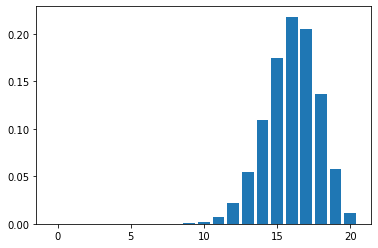

In [14]:
# plt.bar() fonskiyonu ile bunun bar plotunu çizelim:

plt.bar(list(range(n+1)), dist);

## Question 2
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 4.74**

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.

#### a. What is the probability that a person taking the examination scores higher than 72?

this is P(X>72)

In [15]:
# ortalaması 78 olan, varyansı 36 olan normal bir dağılım var.

# sigma varyantın karekökü olduğundan sigmayı bulabilirim.

mu = 78
sigma = np.sqrt(36)
x = 72

# cdf ile 72'e kadar olan toplamı bulurum sonra 1 den cdf (72) yi çıkartırım.

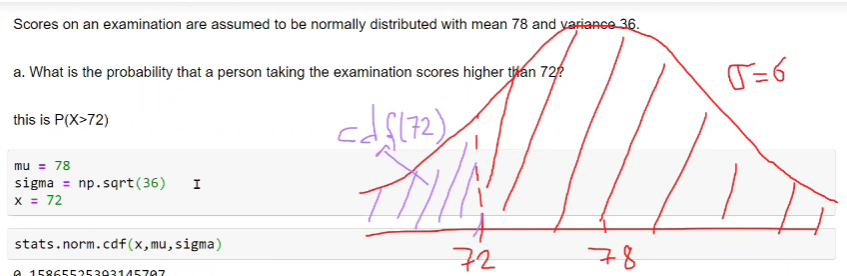

In [16]:
stats.norm.cdf(x, mu, sigma)

# bu p(X<=72)

0.15865525393145707

1'den p(X<72) yi çıkartırsam p(X>72) yi bulurum

In [17]:
1 - stats.norm.cdf(x,mu,sigma)

0.8413447460685429

 ### b. Suppose that students scoring in the top 10% of this distribution are to receive an A grade.
### What is the minimum score a student must achieve to earn an A grade?

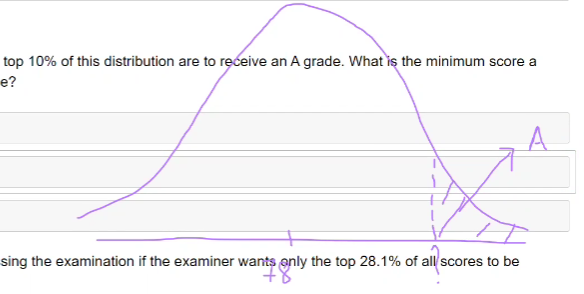

In [24]:
# sorudaki X değeri (0.1) ne kadar olan oran (1 - 0.1) dir. 

# Bu scipy da q parametresi ile gösterildiği için biz de q değişkeni ile tanımladık 

q = 1 - 0.1


In [25]:
stats.norm.ppf(q, mu, sigma)

# 85.68 alırsa notu A gelir. (stats.norm.ppf() X değerini verir)

85.6893093932676

In [26]:
a = stats.norm.ppf(q, mu, sigma)

stats.norm.cdf(a, mu, sigma)

# cdf i kullandığında value'dan (x'ten) kümülatif olasılığa (p'ye) ulaşıyorsun,

# ppf i kullandığında kümülatif olasılıktan value'ya (x'e) ulaşıyorsun

0.9000000000000001

In [27]:
stats.norm.cdf(85.7, mu, sigma) 

# cdf'in içine parametre olarak ppf'i elle koyduk (X=85.7 değeri) ve p ye ulaştık

0.9003123403704779

### c. What must be the cutoff point for passing the examination if the examiner wants only the top 28.1% of all scores to be passing?

In [28]:
# soru öncekiyle aynı. 
# ppf() içine 1- 0.28 kümülatif p değerini koyup buna karşılık gelen X değerini (notu) bulacağım. 

q = 1 - 0.281
q

0.719

In [30]:
stats.norm.ppf(q, mu, sigma)

# stats.norm.ppf(1-0.28, mu, sigma)

# 81.48 not alırsam top 28.1% lik kısım içine girerim. 

81.47924035456623

### d. Approximately what proportion of students have scores 5 or more points above the score that cuts off the lowest 25%?

In [31]:
q1 = 0.25
x1 = stats.norm.ppf(q1,mu,sigma)
x1

# en düşük 25% lik kesime giren not değeri 73.95

73.95306149882352

In [32]:
x2 = x1 +5
x2

78.95306149882352

In [35]:
stats.norm.cdf(x2,mu,sigma)

# bu 78.95 e kadar alınan notların olasılığı. bunu 1'den çıkartmalıyım ki bu nottan yüksek değerlerin olasılığını bulayım.

0.5631039448377338

In [34]:
1 - stats.norm.cdf(x2,mu,sigma)

# 1 - stats.norm.cdf(x1+5,mu,sigma)


0.43689605516226615

*OPTIONAL*

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score
exceeds 84? 

In [23]:
b = 1- stats.norm.cdf(84, mu, sigma)
b

0.15865525393145707

In [24]:
a = 1- stats.norm.cdf(72, mu, sigma)
a

0.8413447460685429

In [26]:
b/a

0.18857341734506025

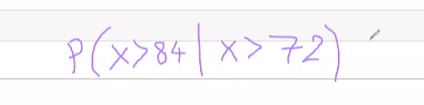

## Question 3
*Lane, D. (2006). Online statistics education: a multimedia course of study (http://onlinestatbook.com/). Rice University.*

### For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

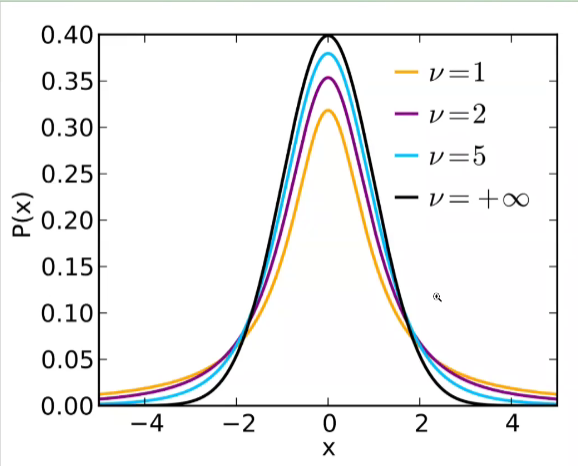

Soruya dönersek:

### For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

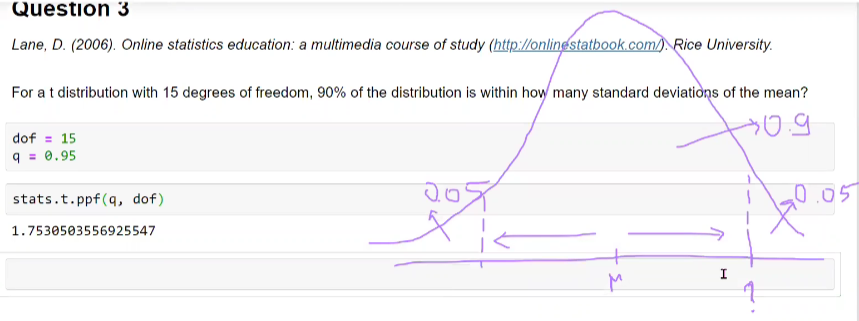

In [36]:
dof = 15  # degrees of freedom
q = 0.95

In [25]:
# olasılıktan değere gidiyorum. ppf kullanıyorum, içine de o noktaya ait cdf i koyacağım (0.95'i)

stats.t.ppf(q, dof)


1.7530503556925547

In [27]:
# t distribution un pdf'ini çizelim:

xs = np.linspace(-5, 5, 1000)
xs

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

In [28]:
stats.t.pdf(xs,3)

array([0.00421935, 0.00424965, 0.00428022, 0.00431106, 0.00434216,
       0.00437354, 0.0044052 , 0.00443714, 0.00446936, 0.00450186,
       0.00453466, 0.00456774, 0.00460112, 0.0046348 , 0.00466878,
       0.00470306, 0.00473765, 0.00477255, 0.00480777, 0.0048433 ,
       0.00487915, 0.00491532, 0.00495183, 0.00498866, 0.00502583,
       0.00506333, 0.00510117, 0.00513936, 0.0051779 , 0.00521679,
       0.00525604, 0.00529564, 0.00533561, 0.00537595, 0.00541665,
       0.00545774, 0.0054992 , 0.00554105, 0.00558328, 0.0056259 ,
       0.00566892, 0.00571234, 0.00575617, 0.0058004 , 0.00584505,
       0.00589012, 0.0059356 , 0.00598152, 0.00602787, 0.00607465,
       0.00612187, 0.00616954, 0.00621767, 0.00626624, 0.00631528,
       0.00636478, 0.00641476, 0.00646521, 0.00651614, 0.00656757,
       0.00661948, 0.00667189, 0.0067248 , 0.00677822, 0.00683216,
       0.00688662, 0.0069416 , 0.00699712, 0.00705318, 0.00710977,
       0.00716692, 0.00722463, 0.0072829 , 0.00734173, 0.00740

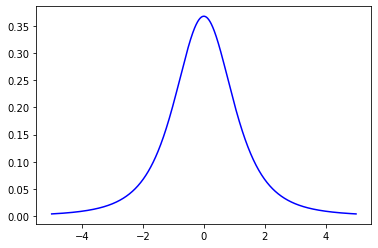

In [27]:
# önce t dağılımının plotunu görelim. 

xs = np.linspace(-5, 5, 1000)

plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df = 3)")

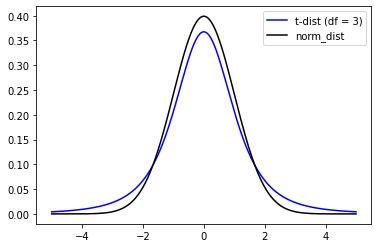

In [29]:
# t dağılımı ile normal dağılımı üst üste bindirip görelim:

xs = np.linspace(-5, 5, 1000)

plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df = 3)") # t dağılım plotu

plt.plot(xs, stats.norm.pdf(xs), "k", label = "norm_dist")  # normal dağılım plotu

plt.legend()

# t dağılımı daha basık (spread daha fazla), standard deviation daha büyük.

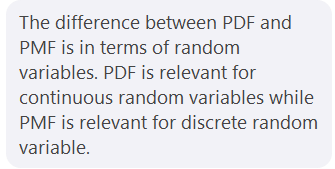

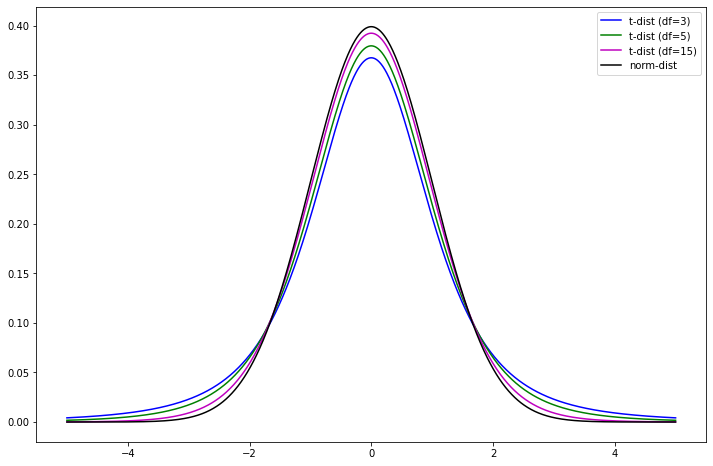

In [30]:
plt.figure(figsize=(12,8))
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df=3)")
plt.plot(xs, stats.t.pdf(xs,5), "g", label = "t-dist (df=5)")
plt.plot(xs, stats.t.pdf(xs,15), "m", label = "t-dist (df=15)")
plt.plot(xs, stats.norm.pdf(xs), "k", label = "norm-dist")
plt.legend()

# serbestlik derecesi daha yüksek olan t dağılımının normal dağılıma daha yakın olduğunu görebiliyorum.

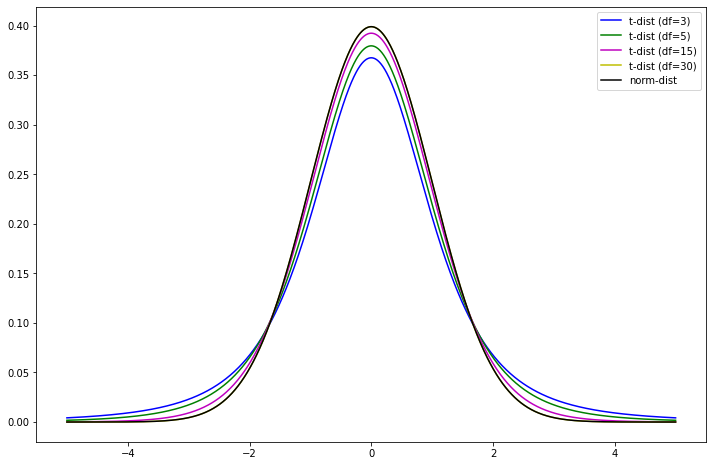

In [30]:

plt.figure(figsize=(12,8))
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df=3)")
plt.plot(xs, stats.t.pdf(xs,5), "g", label = "t-dist (df=5)")
plt.plot(xs, stats.t.pdf(xs,15), "m", label = "t-dist (df=15)")
plt.plot(xs, stats.t.pdf(xs,30), "m", label = "t-dist (df=30)")
plt.plot(xs, stats.norm.pdf(xs), "k", label = "norm-dist")
plt.legend()

# dof=30 yaptığımızda t dağılımı neredeyse normal dağılımla aynı oldu.

## Confidence Intervals Using the Normal Distribution

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

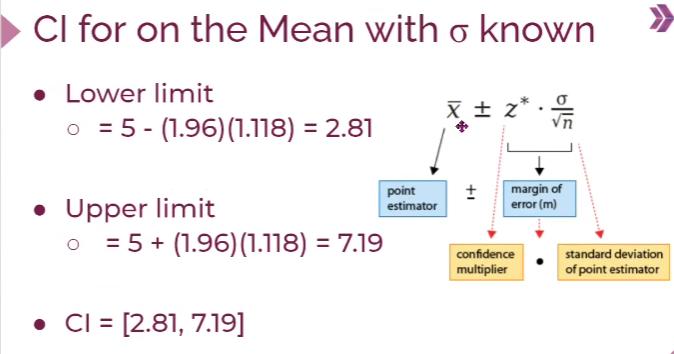

In [ ]:
Burdaki soruda ORTALAMA üzerine GÜVEN ARALIĞI bulacağız. 

In [31]:
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

### 1. Load "tips" dataset from Seaborn library

In [33]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

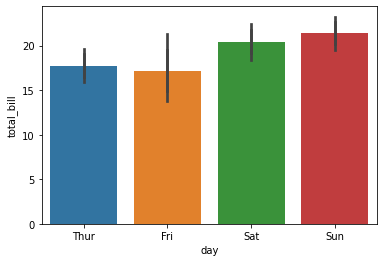

In [34]:
sns.barplot(data=tips, x='day', y = 'total_bill', ci=95)

# burada gruplarayarak bir çizim yaptırmış oldum. 
# bu plot aggregation olarak grupların neyini alıyor? average'ını alıyor. 
# o yüzden benim mean dememe gerek kalmayacak


<AxesSubplot:xlabel='day', ylabel='total_bill'>

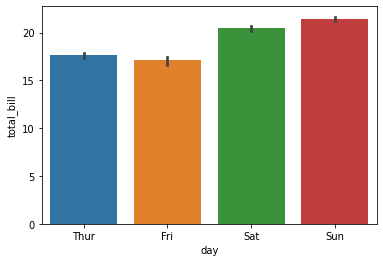

In [37]:
sns.barplot(data=tips, x='day', y = 'total_bill', ci=20)

3. Subset a dataframe just including Sunday tips

In [48]:
tipsSun = tips[tips['day'] == 'Sun']
tipsSun

# tips datasetinden gün = Pazar olan satırları çekerek yeni bir dataset oluşturdum

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


### 4. Calculate mean and std of "total_bill"

In [49]:
tipsSun["total_bill"].mean()

# pazar günü ortalama fatura miktarı 21.41

21.41

In [50]:
tipsSun["total_bill"].std()

#  pazar günkü faturaların standart sapması 8.83

8.832121828869889

In [51]:
sigma = tipsSun["total_bill"].std()
sigma

8.832121828869889

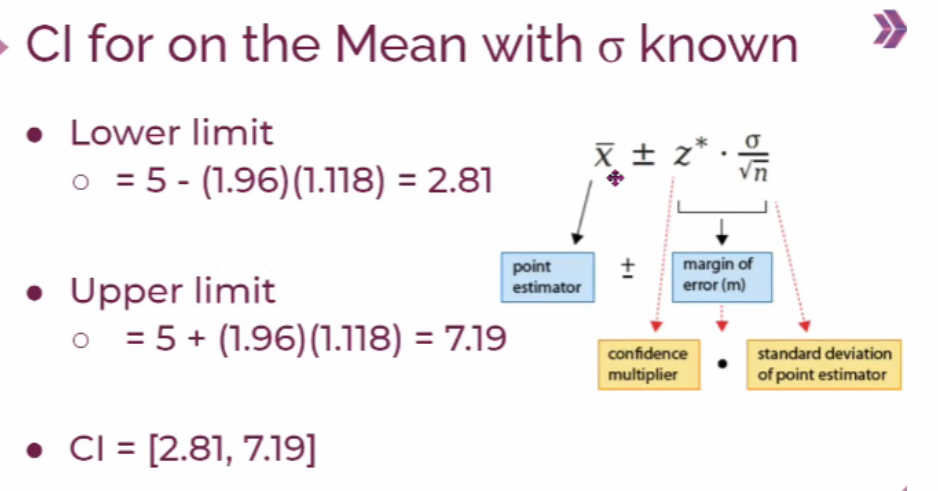

### 5. Calculate standart error of the mean (sem)

In [52]:
# n, data frame'imdeki observation sayısı. bunu len() fonksiyonu ile bulabilirim.

n = len(tipsSun)
n

76

In [24]:
# n sayısını .shape() metodu ile de bulabilirim.

tipsSun.shape[0]

76

In [53]:
# sem =  standart error of the mean ( σ / √n )

sem = sigma / np.sqrt(n)
sem

# benim ortalama (mean) istatistiğime ilişkin standart hata: 
# (standart error of the mean) 1.01 çıktı. 

1.0131138555021968

### 6. Calculate the margin of error (95%)

In [54]:
from scipy import stats

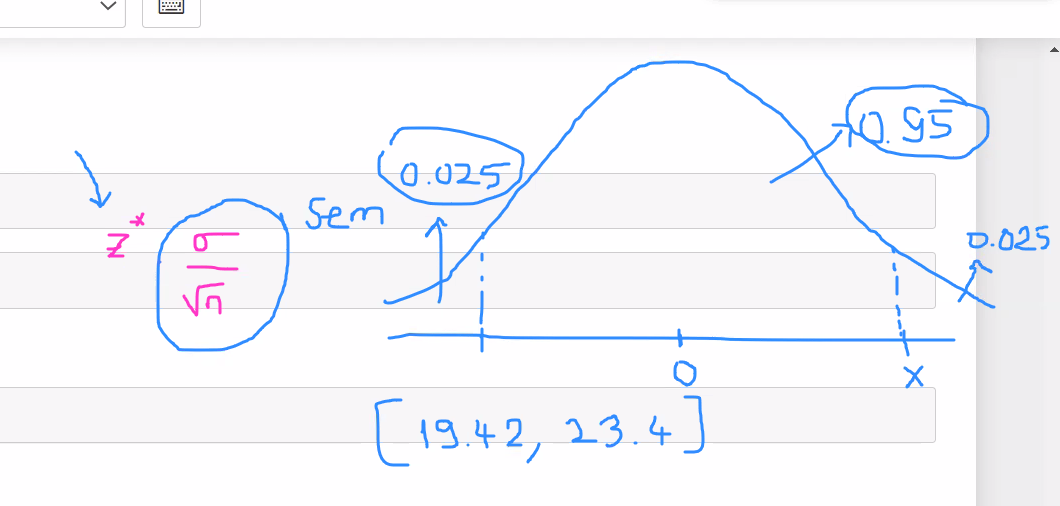

In [55]:
# scipy ile z* hesaplama. (yukarda x olan değer)

stats.norm.ppf(0.975)

1.959963984540054

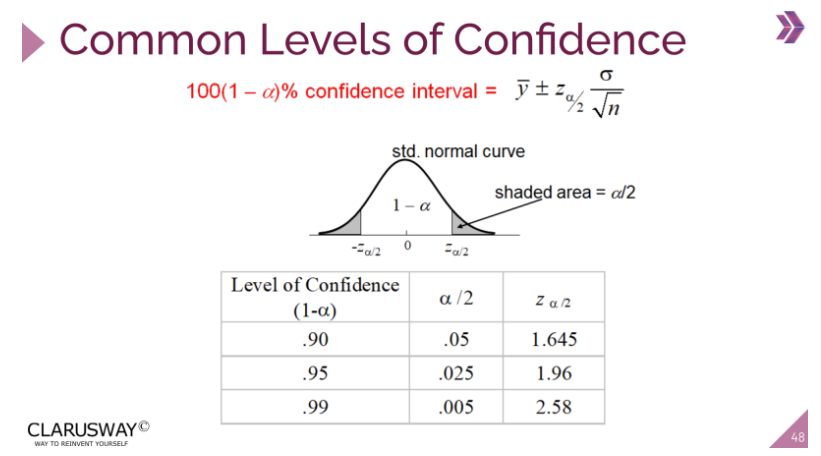

In [56]:
moe = 1.96 * sem 

In [57]:
moe

1.9857031567843058

### 7. Calculate the upper confidence limit

In [58]:
tipsSun["total_bill"].mean() + moe

# Ci upper limit : 23.4

23.395703156784307

### 8. Calculate the lower confidence limit

In [59]:
tipsSun["total_bill"].mean() - moe

# Ci lower limit : 19.42

# mean'imin güven aralığı yüzde 95 olarak 19.42 - 23.4 aralığındadır.

19.424296843215693

### 9. Calculate 95% Confidence Interval around the mean by using scipy.stats

### scipy.stats kullanarak ortalama etrafında %95 Güven Aralığını hesaplayın

In [60]:
# .interval() metodu kullanacağız. bu metod ile confidence interval ı buluyoruz.

# interval(alpha, loc=0, scale=1) 
# normalde alpha : significance level (1-ci)dir. ama python da alpha yerine direkt ci yi koyuyoruz. ordan kendisi alphayı buluyor.
# loc : ortalama (mean)
# scale : standart error of the mean (ortalamaya ilişkin standart hata) 


stats.norm.interval(alpha=0.95, loc=tipsSun["total_bill"].mean(), scale=sem)

(19.424333330977177, 23.395666669022823)

In [62]:

stats.norm.interval(alpha=0.85, loc=tipsSun["total_bill"].mean(), scale=sem)

(19.951590721360795, 22.86840927863921)